In [10]:
%reload_ext autoreload
%autoreload 2

In [14]:
from psiop import *
from solver import * 

# 1D Examples in periodic conditions

## Complex Ginzburg-Landau equation


*********************************
* Partial differential equation *
*********************************

                                                                                        2          
∂                                            2                                         ∂           
──(u(t, x)) = - (1 + 0.1⋅ⅈ)⋅u(t, x)⋅│u(t, x)│  + (1.0 + 0.2⋅ⅈ)⋅u(t, x) + (1.0 + 0.5⋅ⅈ)⋅───(u(t, x))
∂t                                                                                       2         
                                                                                       ∂x          

********************
* Equation parsing *
********************


Equation rewritten in standard form: (1 + 0.1*I)*u(t, x)*Abs(u(t, x))**2 - (1.0 + 0.2*I)*u(t, x) + Derivative(u(t, x), t) - (1.0 + 0.5*I)*Derivative(u(t, x), (x, 2))

Expanded equation: u(t, x)*Abs(u(t, x))**2 + 0.1*I*u(t, x)*Abs(u(t, x))**2 - 1.0*u(t, x) - 0.2*I*u(t, x) + Derivative(u(t, x), t) - 1.0*Derivative(u(t, x), (x, 2))

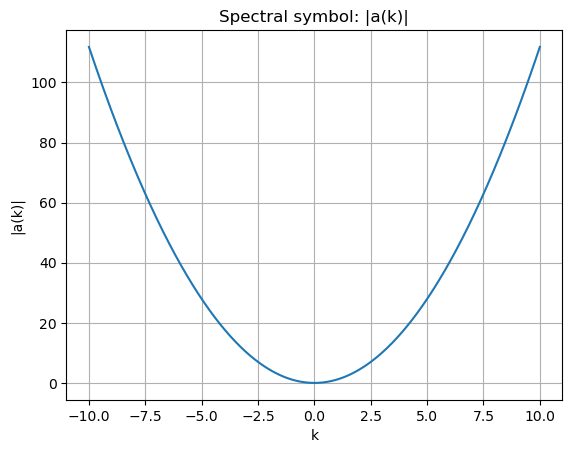


*******************
* Solving the PDE *
*******************


*********************
* Solution plotting *
*********************



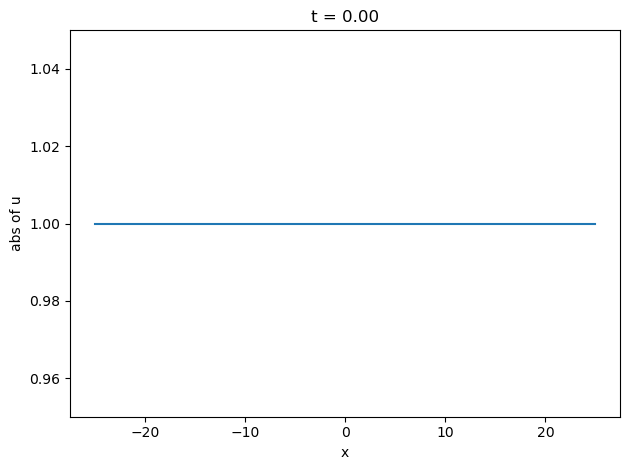

In [15]:
# 1. Define the symbols and the equation
t, x = symbols('t x', real=True)
u = Function('u', complex=True)
# Equation parameters
alpha = 1.0
beta = 0.5  # Imaginary part of diffusion
gamma = 1.0
delta = 0.2  # Imaginary part of the linear term
epsilon = 0.1  # Imaginary part of the nonlinearity
# Complex Ginzburg-Landau equation
linear_diffusion = (alpha + I*beta) * diff(u(t, x), x, x)
linear_growth = (gamma + I*delta) * u(t, x)
nonlinear_term = (1 + I*epsilon) * Abs(u(t, x))**2 * u(t, x)
# Complete equation
equation = Eq(diff(u(t, x), t), linear_diffusion + linear_growth - nonlinear_term)

# 2. Initial condition: complex plane wave
def initial_condition(x_vals):
    A = 1.0  # Amplitude
    k = 0.5  # Wave number
    return A * np.exp(1j * k * x_vals)  # Exact solution in the absence of nonlinearity

# 3. Solver setup
solver = PDESolver(equation, time_scheme='ETD-RK4', dealiasing_ratio=2/3)
# Simulation parameters
Lx = 50.0
Nx = 1024
Lt = 10.0
Nt = 1000
# Setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='periodic',
    initial_condition=initial_condition
)

# 4. Solve
solver.solve()

# 5. Visualization
ani = solver.animate(component='abs')
HTML(ani.to_jshtml())


## Sine-Gordon equation

In [ ]:
# 1. Define the symbols and the equation
t, x = symbols('t x', real=True)
u = Function('u', real=True)
# Sine-Gordon equation
equation = Eq(diff(u(t, x), t, t), diff(u(t, x), x, x) + sin(u(t, x)))

# 2. Initial condition: stationary kink
def initial_condition(x_vals):
    x0 = 0  # Position of the kink
    return 4 * np.arctan(np.exp(x_vals - x0))  # Kink soliton

# 3. Initial velocity (for a second-order equation in time)
def initial_velocity(x_vals):
    return np.zeros_like(x_vals)  # Initial velocity is zero

# 4. Solver configuration
solver = PDESolver(equation, time_scheme='ETD-RK4')
# Simulation parameters
Lx = 20.0
Nx = 512
Lt = 40.0
Nt = 1500

# Setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='periodic',
    initial_condition=initial_condition,
    initial_velocity=initial_velocity  # Necessary for second-order equations
)

# 5. Solve
solver.solve()

# 6. Visualization
ani = solver.animate(component='abs')  # Visualize the amplitude of u
HTML(ani.to_jshtml())


## Kuramoto-Sivashinsky equation

In [ ]:
# 1. Symbols
t, x, kx = symbols('t x kx')
u_func = Function('u')
u = u_func(t, x)

# 2. Kuramoto-Sivashinsky equation
# eq = Eq(diff(u, t), -u * diff(u, x) - diff(u, x, 2) - diff(u, x, 4))
eq = Eq(diff(u, t), -u * diff(u, x) - diff(u, x, 2) - 0.1 * diff(u, x, 4))

# 3. Creating the solver
solver = PDESolver(eq, time_scheme='ETD-RK4', dealiasing_ratio=0.5)

# 4. Domain parameters
Lx = 2 * np.pi
Nx = 256
Lt = 50.0
Nt = 1000

# 5. Initial condition: smooth random perturbation
rng = np.random.default_rng(42)
# def initial_condition(x_vals):
#    return 0.1 * np.sin(x_vals) + 0.01 * rng.standard_normal(x_vals.shape)

def initial_condition(x_vals):
    return 0.1 * np.cos(3 * x_vals) + 0.01 * rng.normal(size=x_vals.shape)

# 6. Setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='periodic',
    initial_condition=initial_condition
)

# 7. Solving
solver.solve()

# 8. Visualization
ani = solver.animate(component='real')
HTML(ani.to_jshtml())


# 1D Examples in Dirichlet conditions

## Non-linear Schrödinger equation

In [ ]:
# Symbolic variables
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Linear operator: -∂²/∂x² → ψOp(xi²)
linear_symbol = xi**2

# Non-linear term: |u|² * u
nonlinear_term = Abs(u(t, x))**2 * u(t, x)

# Non-linear Schrödinger equation
equation = Eq(I * diff(u(t, x), t), psiOp(linear_symbol, u(t, x)) + nonlinear_term)

# Create the solver
solver = PDESolver(equation)

# Parameters
Lx = 20.0
Nx = 512
Lt = 10.0
Nt = 1000

# Initial condition: fundamental soliton
def initial_condition(x):
    return 2 / np.cosh(x)  # Order 1 soliton

# Configuration
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)

# Solve
solver.solve()

# Visualization
ani = solver.animate(component='abs')
HTML(ani.to_jshtml())


## Heat equation with source

In [ ]:
# Symbolic variables
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Linear operator: ∂²/∂x² → ψOp(-xi²)
linear_symbol = -xi**2

# Heat source: Gaussian pulse centered at x=0
source_expr = exp(-(x**2) - t**2)

# Heat equation with source
equation = Eq(diff(u(t, x), t), psiOp(linear_symbol, u(t, x)) + source_expr)

# Solver
solver = PDESolver(equation)

# Spatial and temporal domain
Lx = 10.0
Nx = 256
Lt = 5.0
Nt = 500

# Initialization: zero temperature initially
def initial_condition(x):
    return np.zeros_like(x)

# Dirichlet boundary conditions: fixed temperature at the ends
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)

# Solving
solver.solve()

# Visualization
ani = solver.animate()
HTML(ani.to_jshtml())


## KdV equation

In [ ]:
# Symbolic variables
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Linear operator: ∂³/∂x³ → ψOp(i ξ³)
linear_symbol = I * xi**3

# Nonlinear term: u ∂u/∂x
nonlinear_term = u(t, x) * diff(u(t, x), x)

# KdV equation
equation = Eq(diff(u(t, x), t), psiOp(linear_symbol, u(t, x)) - nonlinear_term)

# Solver
solver = PDESolver(equation)

# Parameters
Lx = 40.0
Nx = 512
Lt = 30.0
Nt = 1500

# Initial condition: KdV soliton
def initial_condition(x):
    return 3 * (1 / np.cosh(x / 2))**2  # Height 3, width 2

# Setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)

# Solve
solver.solve()

# Visualization
ani = solver.animate(component='real')
HTML(ani.to_jshtml())

## Airy equation (not sure that it works - low-amplitude linear waves in shallow water...)

In [ ]:
# Symbolic variables
t, x, xi = symbols('t x xi', real=True)
u = Function('u')
# Linear operator: ∂³/∂x³ → ψOp(i ξ³)
linear_symbol = I * xi**3
# Airy equation
equation = Eq(diff(u(t, x), t), psiOp(linear_symbol, u(t, x)))
# Solver
solver = PDESolver(equation)
# Parameters
Lx = 40.0
Nx = 512
Lt = 10.0
Nt = 500
# Initial condition: localized pulse (deformed Gaussian)
def initial_condition(x):
    return np.exp(-x**2) * (1 - 2*x**2)
# Configuration
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)
# Solving
solver.solve()
# Visualization
ani = solver.animate()
HTML(ani.to_jshtml())


## Fisher-KPP equation

In [ ]:
# Symbolic variables
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Linear operator: D ∂²/∂x² → ψOp(-D ξ²)
D = 0.5
linear_symbol = -D * xi**2

# Non-linear term: r u(1 - u), where r = growth rate
r = 1.0
nonlinear_term = r * u(t, x) * (1 - u(t, x))

# Fisher-KPP equation
equation = Eq(diff(u(t, x), t), psiOp(linear_symbol, u(t, x)) + nonlinear_term)

# Creation of the solver
solver = PDESolver(equation)

# Parameters
Lx = 20.0
Nx = 256
Lt = 10.0
Nt = 500

# Initial condition: a wave localized at the center
def initial_condition(x):
    return np.where(np.abs(x) < 1, 1.0, 0.0)

# Configuration
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)

# Solving
solver.solve()

# Visualization
ani = solver.animate()
HTML(ani.to_jshtml())


## Klein-Gordon equation with Higgs potential

In [ ]:
# Symbolic variables
t, x, xi = symbols('t x xi', real=True)
u = Function('u')
# Linear operator: ∂²/∂x² → ψOp(-ξ²)
mass = 1.0
nonlinear_coeff = 0.5
linear_symbol = -xi**2 - mass**2
# Non-linear term: λ u³
nonlinear_term = nonlinear_coeff * u(t, x)**3
# Klein-Gordon equation with Higgs potential
equation = Eq(diff(u(t, x), t, 2), psiOp(linear_symbol, u(t, x)) + nonlinear_term)

# Solver
solver = PDESolver(equation)
# Spatial and temporal domain
Lx = 20.0
Nx = 512
Lt = 20.0
Nt = 1000
# Initial condition: localized wave (Gaussian)
def initial_condition(x):
    return np.exp(-(x)**2 / 0.5)
# Initial velocity is zero
def initial_velocity(x):
    return np.zeros_like(x)
# Configuration
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition,
    initial_velocity=initial_velocity
)
# Solving
solver.solve()
# Visualization
ani = solver.animate()
HTML(ani.to_jshtml())


## Benjamin-Ono equation

In [ ]:
# Symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Benjamin-Ono Equation: ∂ₜ u = ψOp(-i |ξ|, u) - u ∂ₓ u
symbol = -I * Abs(xi)
nonlinear = u(t, x) * diff(u(t, x), x)
equation = Eq(diff(u(t, x), t), psiOp(symbol, u(t, x)) - nonlinear)

# Initial condition: soliton-like bump
def initial_condition(x):
    return 2 / (1 + x**2)

# Solver configuration
solver = PDESolver(equation, time_scheme='ETD-RK4', dealiasing_ratio=2/3)

# Parameters
Lx = 40.0
Nx = 1024
Lt = 30.0
Nt = 2000

# Setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    initial_condition=initial_condition,
    boundary_condition='dirichlet'
)

# Solving
solver.solve()

# Visualization
ani = solver.animate(component='real')
HTML(ani.to_jshtml())


## Burgers' equation: Comparative Animation of Viscosity Effects

In [ ]:
t, x, xi = symbols('t x xi', real=True)
u = Function('u')
fig, ax = plt.subplots()
colors = ["r", "g", "b", "k"]
lines = []

## Viscosity: 4 values
nus = [1, 0.1, 0.01, 0.001]
# --- Spatio-temporal domain ---
Lx = 3 * np.pi
Nx = 512
Lt = 100
Nt = 2000

# --- Some initial conditions ---
def ic_sine(x):
    """Simple sine wave"""
    return np.sin(x)
def ic_gaussian(x, x0=0.0, sigma=np.sqrt(0.1)):
    return np.exp(-0.5 * ((x - x0) / sigma) ** 2)
def ic_sech2(x, x0=0.0, delta=0.5, A=2.0):
    """A / cosh^2((x-x0)/delta) (sech^2)"""
    return A / np.cosh((x - x0) / delta) ** 2
def ic_tanh_shock(x, x0=0.0, k=5.0, nu=0.1):
    """Regularized shock profile (tanh)"""
    return -2 * nu * k * np.tanh(0.5 * k * (x - x0))
def ic_two_pulses(x):
    """Two opposing Gaussians (collision)"""
    return ic_gaussian(x, x0=1, sigma=0.5) - ic_gaussian(x, x0=-1, sigma=0.5)
def ic_multimode(x, modes=10, amp_decay=1.0):
    """Sum of sines with random phases -> nonlinear cascade"""
    rng = np.random.RandomState(12345)  # reproducible
    u0 = np.zeros_like(x)
    for k in range(1, modes+1):
        phase = rng.uniform(0, 2*np.pi)
        u0 += (amp_decay / k) * np.sin(k * x + phase)
    return u0
# Choice
initial_condition = ic_two_pulses

for nu, c in zip(nus, colors):
    ## PDE definition using pseudodifferential approach (due to Dirichlet condition).
    linear_symbol = -nu * xi**2
    nonlinear_term = u(t, x) * diff(u(t, x), x)
    eq = Eq(diff(u(t, x), t), psiOp(linear_symbol, u(t, x)) - nonlinear_term)
    solver = PDESolver(eq)
    solver.setup(
        Lx=Lx, Nx=Nx, Lt=Lt, Nt=Nt,
        boundary_condition='dirichlet',
        initial_condition=initial_condition
    )
    sol = np.array(solver.solve())
    xgrid = np.linspace(-Lx/2, Lx/2, Nx) 

    line, = ax.plot([], [], c, label=f"nu={nu}")
    lines.append((line, sol, xgrid))

ax.set_title(r"Burgers' equation: $u_t + u u_x = \nu u_{xx}$")    
ax.legend()
ax.set_xlim(-Lx/2, Lx/2)
ax.set_ylim(-1, 1)
dt = Lt / Nt  # time increment

def init():
    for line, _, _ in lines:
        line.set_data([], [])
    return [l for l, _, _ in lines]
    
def update(frame):
    t_val = frame * dt
    for (line, sol, xgrid) in lines:
        line.set_data(xgrid, sol[frame, :])
    ax.set_xlabel(f"t= {t_val:.2f}")
    return [l for l, _, _ in lines]
    
ani = FuncAnimation(fig, update, frames=len(lines[0][1]), init_func=init, blit=True)
display(HTML(ani.to_jshtml()))
